In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point'

In [3]:
train_dir = r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\dataset\train'
validation_dir = r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\dataset\validation'
test_dir = r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\dataset\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

C:\Users\PMYLS\.conda\envs\f_machine\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [18]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 4,
                         callbacks = callbacks)

Epoch 1/4
50/50 [==============================] - ETA: 0s - loss: 0.4840 - acc: 0.7837
Epoch 1: val_loss improved from 0.48076 to 0.40599, saving model to D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


50/50 [==============================] - 150s 3s/step - loss: 0.4840 - acc: 0.7837 - val_loss: 0.4060 - val_acc: 0.7589
Epoch 2/4
50/50 [==============================] - ETA: 0s - loss: 0.4042 - acc: 0.8131
Epoch 2: val_loss improved from 0.40599 to 0.38630, saving model to D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


50/50 [==============================] - 139s 3s/step - loss: 0.4042 - acc: 0.8131 - val_loss: 0.3863 - val_acc: 0.8080
Epoch 3/4
50/50 [==============================] - ETA: 0s - loss: 0.3450 - acc: 0.8413
Epoch 3: val_loss improved from 0.38630 to 0.34739, saving model to D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


50/50 [==============================] - 144s 3s/step - loss: 0.3450 - acc: 0.8413 - val_loss: 0.3474 - val_acc: 0.8080
Epoch 4/4
50/50 [==============================] - ETA: 0s - loss: 0.3100 - acc: 0.8544
Epoch 4: val_loss improved from 0.34739 to 0.29079, saving model to D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


INFO:tensorflow:Assets written to: D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point\assets


50/50 [==============================] - 168s 3s/step - loss: 0.3100 - acc: 0.8544 - val_loss: 0.2908 - val_acc: 0.8571


In [19]:
model_history.history

{'loss': [0.48403263092041016,
  0.4042108654975891,
  0.3449600338935852,
  0.31002768874168396],
 'acc': [0.7837499976158142,
  0.8131250143051147,
  0.8412500023841858,
  0.8543750047683716],
 'val_loss': [0.4059913456439972,
  0.3863038122653961,
  0.3473881781101227,
  0.2907949984073639],
 'val_acc': [0.7589285969734192,
  0.8080357313156128,
  0.8080357313156128,
  0.8571428656578064]}

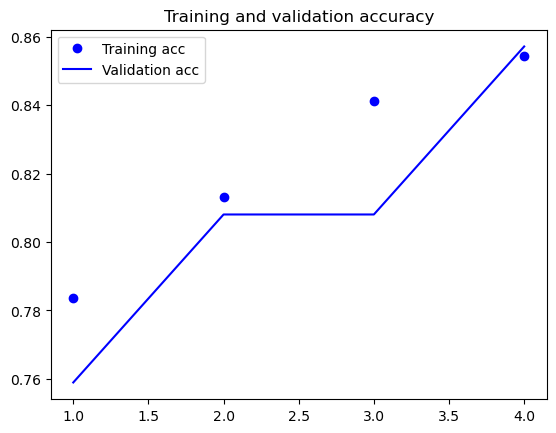

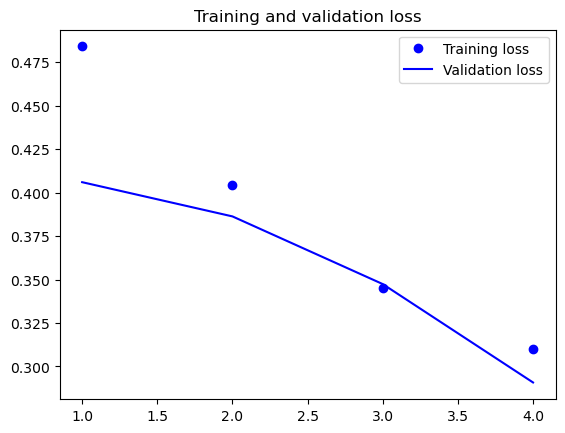

<Figure size 640x480 with 0 Axes>

In [20]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 6s 846ms/step


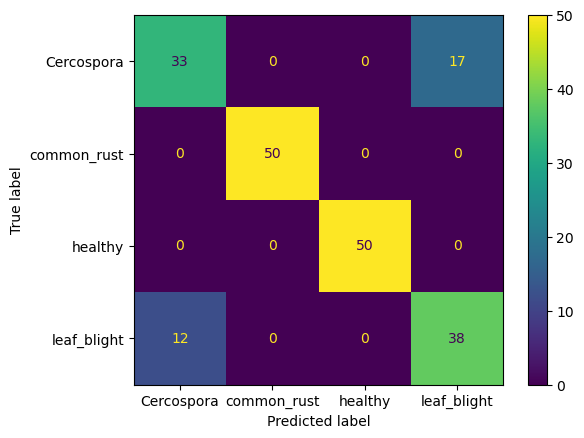

In [21]:
model = load_model(r'D:\Data folder\dsplabs\ELECTRICAL ENGINEERING\SEMESTER 8th\Lab- machine learninng\ML_LAB\lab11\check_point')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [16]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.83      0.68      0.75        50
 common_rust       0.98      0.96      0.97        50
     healthy       0.89      0.96      0.92        50
 leaf_blight       0.71      0.80      0.75        50

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

